## Introduction ##
This project investigates whether or not there there is a correlation between GDP (monetary measure of the market value of all the 
final goods and services produced in a specific time period, by a country), and the life expectancy of its citizens.

There are six nations in the dataset:
~ Chile
~ China
~ Germany
~ Mexico
~ United States of America
~ Zimbabwe

The goals are to:
~  clean the data, 
~  analyze the data, using plots and graphs
~  sum up the findings from the study

Here are some more questions that this project seeks to answer:

    ~ What is the average life expectancy?

    ~ What is the distribution of that life expectancy?

    ~ Has life expectancy increased over time?

    ~ Has a country's GDP increased over time?

    ~ What is a country's average GDP over the years?

    ~ As GDP goes up, does life expectancy also go up?

~~ ~~~ ~~ ~~~ ~~ ~~~ ~~ ~~~ ~~ ~~~ ~~ ~~~ ~~ ~~~ ~~ ~~~ ~~ ~~~

Data sources:
GDP Source: World Bank national accounts data, and OECD National Accounts data files.
Life expectancy Data Source: World Health Organization


## Import Python Modules ##

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
from IPython.display import Image
import matplotlib.ticker

## Load in the data. ##

In [2]:
df = pd.read_csv("all_data.csv")

## Inspect the dataset ##

In [4]:
#Display the first 5 rows, to get a general idea of the dataset. Look at headers. 
df.head(5)

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [5]:
#also display the last 5 rows. Then look at more of the tail.
df.tail
#print(df.tail(60))

<bound method NDFrame.tail of      Country  Year  Life expectancy at birth (years)           GDP
0      Chile  2000                              77.3  7.786093e+10
1      Chile  2001                              77.3  7.097992e+10
2      Chile  2002                              77.8  6.973681e+10
3      Chile  2003                              77.9  7.564346e+10
4      Chile  2004                              78.0  9.921039e+10
..       ...   ...                               ...           ...
91  Zimbabwe  2011                              54.9  1.209845e+10
92  Zimbabwe  2012                              56.6  1.424249e+10
93  Zimbabwe  2013                              58.0  1.545177e+10
94  Zimbabwe  2014                              59.2  1.589105e+10
95  Zimbabwe  2015                              60.7  1.630467e+10

[96 rows x 4 columns]>

In [6]:
#Get the column names
df.columns

Index(['Country', 'Year', 'Life expectancy at birth (years)', 'GDP'], dtype='object')

In [7]:
#Discover how many rows and how many columns there are.
df.shape

(96, 4)

In [8]:
#Another method to discover how many rows there are.
len(df)

96

In [9]:
#Get the size of the dataset ( 96 rows times 4 columns = 384 )
df.size

384

In [10]:
#Is any data missing?
df.count()

Country                             96
Year                                96
Life expectancy at birth (years)    96
GDP                                 96
dtype: int64

In [12]:
missing_count = df.isnull().sum()
print(missing_count)

Country                             0
Year                                0
Life expectancy at birth (years)    0
GDP                                 0
dtype: int64


### No. Nothing is missing. Really. ###

In [43]:
Image(url="dogs_tray_cookies.jpeg", width=300, height=300) 

In [14]:
#Change the column name from "Life Expectancy at Birth" to "LE"
df = df.rename({"Life expectancy at birth (years)":"LE"}, axis = "columns")
df.head()

,Country,Year,LE,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


### Convert the Year column to type int, to prevent Year from  printing out in decimals. ###

In [16]:
df['Year'] = df['Year'].astype(str).apply(lambda x: x.replace('.0',''))

# Done inspecting and cleaning the data. Now time to analyze. #

## What countries are represented? ##

In [17]:
print(df.Country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


## How many years are represented? ##

In [18]:
#print(df.Year.unique())

years = ()
years= df.Year.unique()
print(years)
print('\n')
print("There are " + str(len(years)) + " years represented in this dataset.")

['2000' '2001' '2002' '2003' '2004' '2005' '2006' '2007' '2008' '2009'
 '2010' '2011' '2012' '2013' '2014' '2015']


There are 16 years represented in this dataset.


## What is the Life Expectancy of all 6 countries? What is the distribution of that data? ##

Text(0.5, 1.0, 'Life Expectancy at Birth\n From All 6 Countries')

<Figure size 800x600 with 0 Axes>

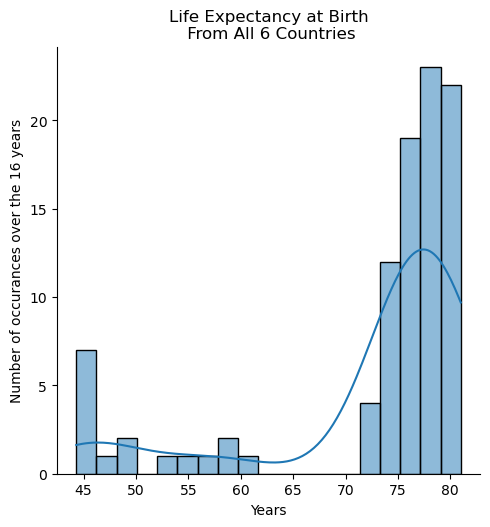

In [19]:
#Life expectancy at birth, over the years.  
#Create a swarm plot
plt.figure(figsize=(8,6))
sns.displot(df.LE, rug =False, kde=True)
plt.xlabel("Years")
plt.ylabel("Number of occurances over the 16 years")
plt.title("Life Expectancy at Birth\n From All 6 Countries")

### Most of the countrys' life expectancies are between 73-81 years old. ###
### The Life Expectancy data is left-skewed. ###

## What is the average Life Expectancy of all 6 countries? ##

In [20]:
#print(df.LE.mean)
avg_LE_allYears = df.LE.groupby(df.Country).mean()
print("These are the Life Expectancy averages, of all years, for all countries: ")
print(avg_LE_allYears)

print('\n')
print("The average Life Expectancy of all countries is : ")
avg_LE_total = sum(avg_LE_allYears) / 6
print(round(avg_LE_total,2))

These are the Life Expectancy averages, of all years, for all countries: 
Country
Chile                       78.94375
China                       74.26250
Germany                     79.65625
Mexico                      75.71875
United States of America    78.06250
Zimbabwe                    50.09375
Name: LE, dtype: float64


The average Life Expectancy of all countries is : 
72.79


### The average life expectancy, of all countries combined, is 72.8 years. ###

## Has Life Expectancy increased over the years? ##

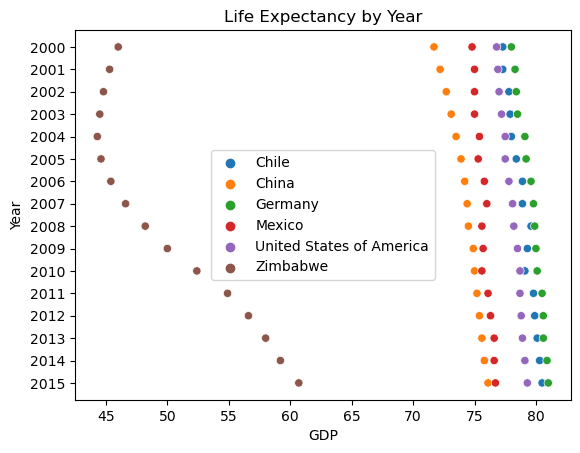

In [21]:
sns.scatterplot(data = df, x = df.LE , y = df.Year, hue = "Country")

plt.legend(loc='center')
plt.legend(loc='center')
plt.xlabel("GDP")
plt.ylabel("Year")
plt.title("Life Expectancy by Year")
plt.show()

### Life Expectancy has increased, over the years, for all 6 of these countries, ###
### with Zimbabwe having the largest increase, going from 46 years to 61 years. ###

In [22]:
dfMeans = df.drop("Year", axis = 1).groupby("Country").mean().reset_index()

Text(0.5, 1.0, 'Averages for Life Expectancy, per Country')

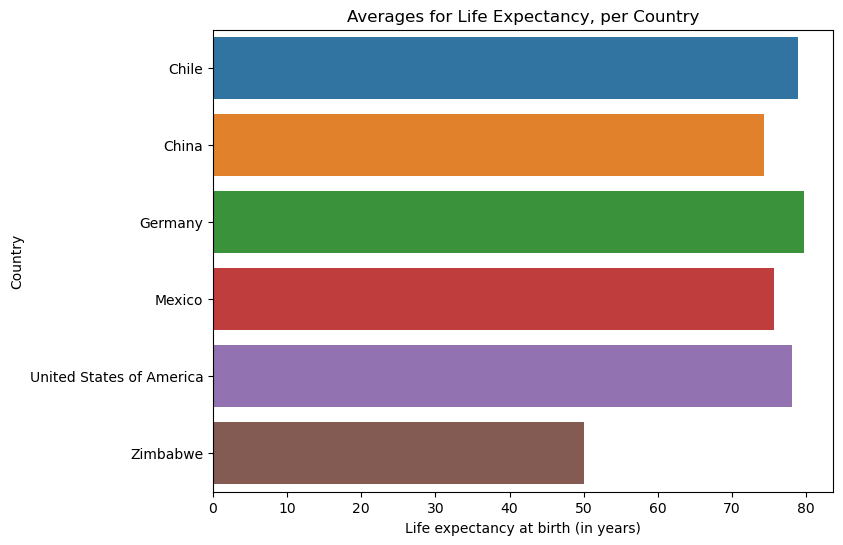

In [23]:
plt.figure(figsize=(8,6))
sns.barplot(x="LE", y="Country", data=dfMeans)
plt.xlabel("Life expectancy at birth (in years)")
plt.title("Averages for Life Expectancy, per Country")

### These are the averages, for life expectancies, per country. ###
### This is hard to read though. Let's look at a different graph. ###

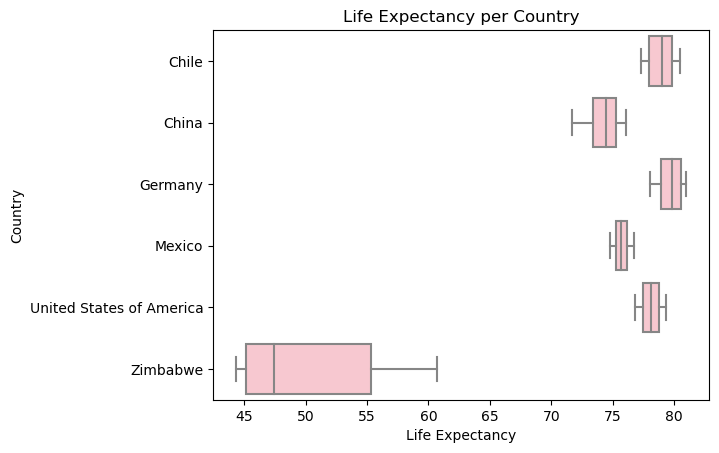

In [24]:
sns.boxplot(data = df, x = df.LE , y = df.Country, color = "pink")
plt.xlabel("Life Expectancy")
plt.title("Life Expectancy per Country")
plt.show()

### This box plot is easier to read. ###
### Germany has the highest life expectancy.  Chile is a very close 2nd. Zimbabwe has the lowest life expectancy. ###

## What is the GDP per country ? ###

Text(0.5, 1.0, 'GDP\n From All 6 Countries')

<Figure size 800x600 with 0 Axes>

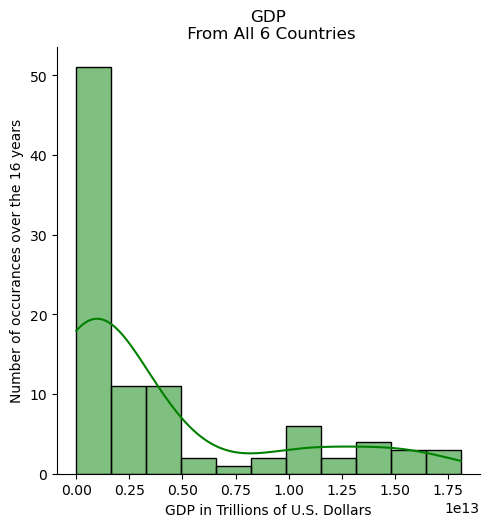

In [25]:
plt.figure(figsize=(8,6))
sns.displot(df.GDP, rug = False, kde=True, color = 'green')
plt.xlabel("GDP in Trillions of U.S. Dollars")
plt.ylabel("Number of occurances over the 16 years")
plt.title("GDP\n From All 6 Countries")

### The GDP distribution is right-skewed. This is opposite of the bar chart distribution above, for life ###
### expectency, which is left-skewed. This suggests that there is a correlation between Life Expectancy and GDP. ###

In [26]:
#print(df.LE.mean)
avg_GDP_allYears = df.GDP.groupby(df.Country).mean()
print("These are the GDP averages, of all years, for all countries: ")
print(avg_GDP_allYears)

These are the GDP averages, of all years, for all countries: 
Country
Chile                       1.697888e+11
China                       4.957714e+12
Germany                     3.094776e+12
Mexico                      9.766506e+11
United States of America    1.407500e+13
Zimbabwe                    9.062580e+09
Name: GDP, dtype: float64


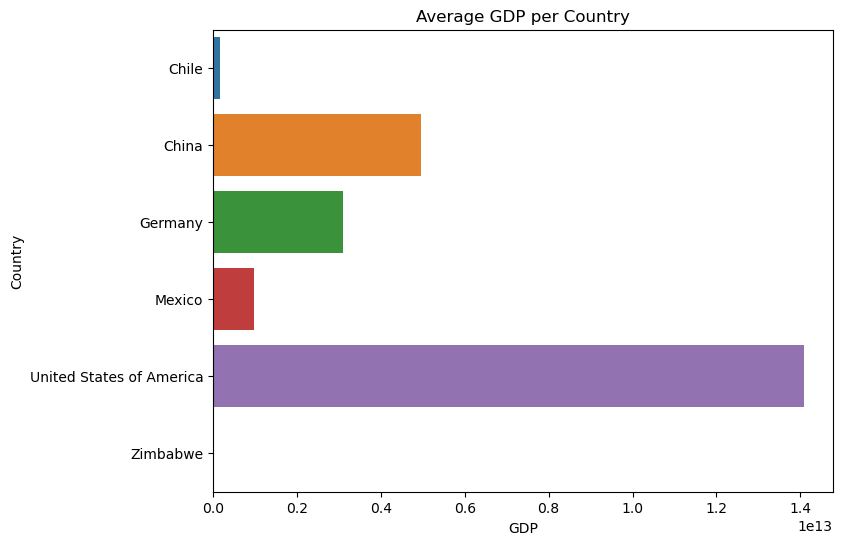

In [27]:
plt.figure(figsize=(8,6))
sns.barplot(x="GDP", y="Country", data=dfMeans)
plt.xlabel("GDP")
plt.title("Average GDP per Country");

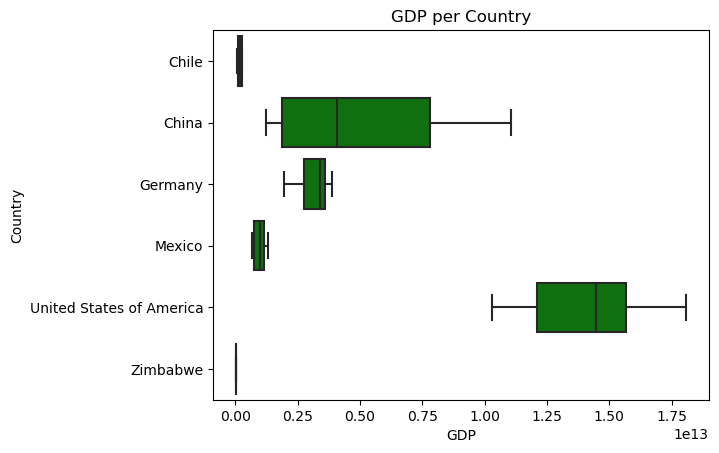

In [28]:
sns.boxplot(data = df, x = df.GDP , y = df.Country, color = "green")
plt.xlabel("GDP")
plt.title("GDP per Country")
plt.show()

### USA has the highest GDP. China has the 2nd highest GDP. However, USA's lowest GDP outlier, ###
### is about the same as China's highest GDP outlier. ### 
### Zimbabwe's GDP is so low that it does not even show up on the bar chart. ###

## What is the GDP per year? ##

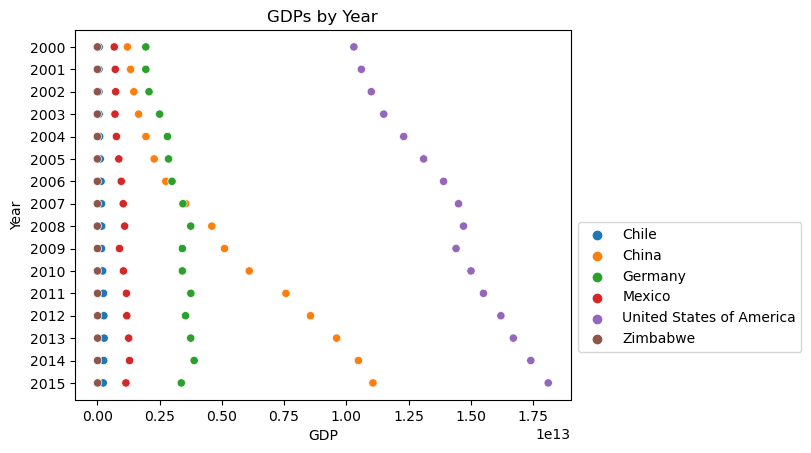

In [29]:
sns.scatterplot(data = df, x = df.GDP , y = df.Year, hue = "Country")

plt.legend(loc='best', bbox_to_anchor=(1, 0.5), ncol=1)
plt.xlabel("GDP")
plt.ylabel("Year")
plt.title("GDPs by Year")
plt.show()

In [30]:
# chile=df[df.Country=='Chile'].reset_index(drop=True)
# china=df[df.Country=='China'].reset_index(drop=True)
# germany=df[df.Country=='Germany'].reset_index(drop=True)
# mexico=df[df.Country=='Mexico'].reset_index(drop=True)
# usa=df[df.Country=='USA'].reset_index(drop=True)
# zimbabwe=df[df.Country=='Zimbabwe'].reset_index(drop=True)

## What is GDP vs Life Expectancy? ##

### Life expectancy vs GDP ###

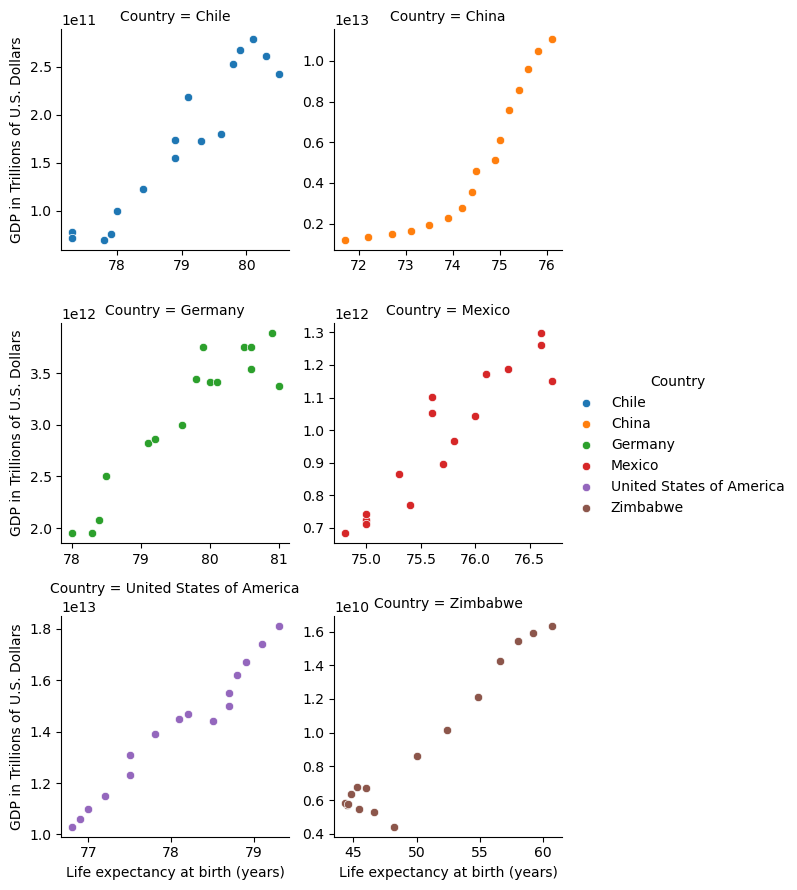

In [31]:
graph = sns.FacetGrid(df, col="Country", col_wrap=2,
                      hue = "Country", sharey = False, sharex = False)
graph = (graph.map(sns.scatterplot,"LE", "GDP")
         .add_legend()
         .set_axis_labels("Life expectancy at birth (years)", "GDP in Trillions of U.S. Dollars"));

### There is a correlation between life expectancy and GDP. ###
### As GDP goes up, so does life expectancy. ###

### ... ###
### Now let's look at life expectancy vs Year ###

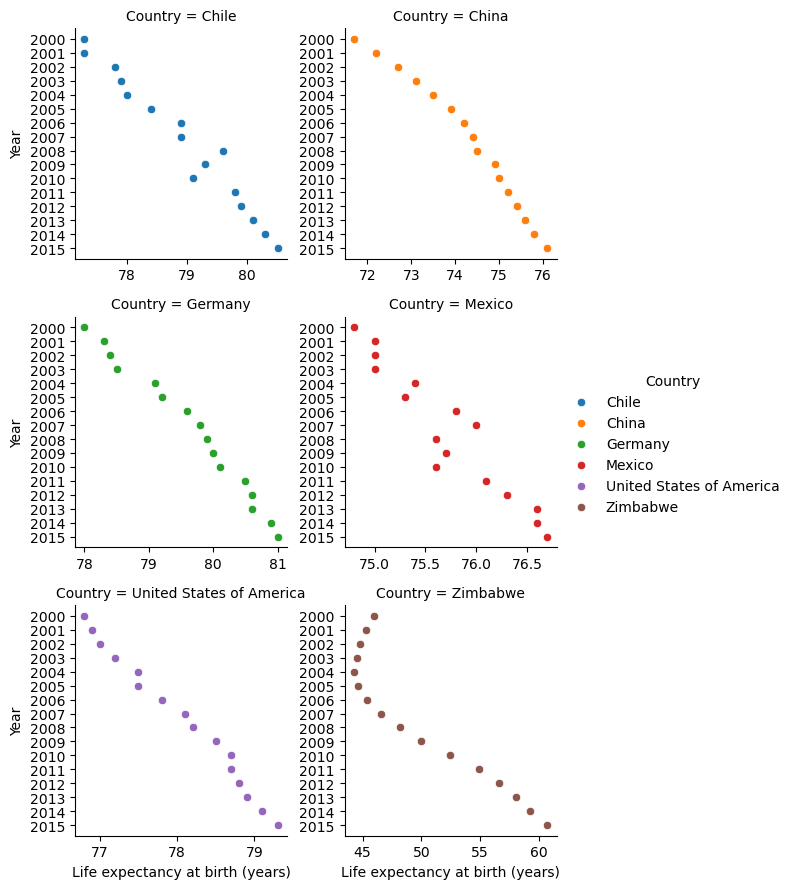

In [32]:

graph = sns.FacetGrid(df, col="Country", col_wrap=2,
                      hue = "Country", sharey = False, sharex = False)
graph = (graph.map(sns.scatterplot,"LE", "Year")
         .add_legend()
         .set_axis_labels("Life expectancy at birth (years)", "Year"));


### As GDP goes up, the Life Expectancy of a country goes up.  This is the case for all but Zimbabwe ###
### where the life expectancy went down briefly, from the years 2001-2005, even though GDP went up. ###

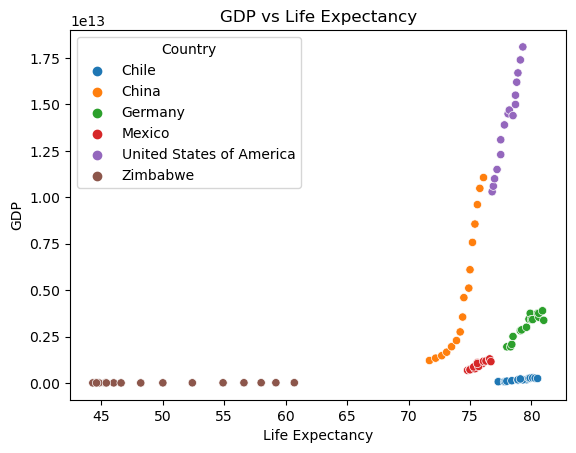

In [33]:
sns.scatterplot(data = df, x = df.LE, y = df.GDP, hue = "Country")
plt.xlabel("Life Expectancy")
plt.ylabel("GDP")
plt.title("GDP vs Life Expectancy")
plt.show()

### Single out Zimbabwe to have a closer look. ###

In [34]:
Zimbabwe = df[df["Country"] == "Zimbabwe"]
print(Zimbabwe)


     Country  Year    LE           GDP
80  Zimbabwe  2000  46.0  6.689958e+09
81  Zimbabwe  2001  45.3  6.777385e+09
82  Zimbabwe  2002  44.8  6.342116e+09
83  Zimbabwe  2003  44.5  5.727592e+09
84  Zimbabwe  2004  44.3  5.805598e+09
85  Zimbabwe  2005  44.6  5.755215e+09
86  Zimbabwe  2006  45.4  5.443896e+09
87  Zimbabwe  2007  46.6  5.291950e+09
88  Zimbabwe  2008  48.2  4.415703e+09
89  Zimbabwe  2009  50.0  8.621574e+09
90  Zimbabwe  2010  52.4  1.014186e+10
91  Zimbabwe  2011  54.9  1.209845e+10
92  Zimbabwe  2012  56.6  1.424249e+10
93  Zimbabwe  2013  58.0  1.545177e+10
94  Zimbabwe  2014  59.2  1.589105e+10
95  Zimbabwe  2015  60.7  1.630467e+10


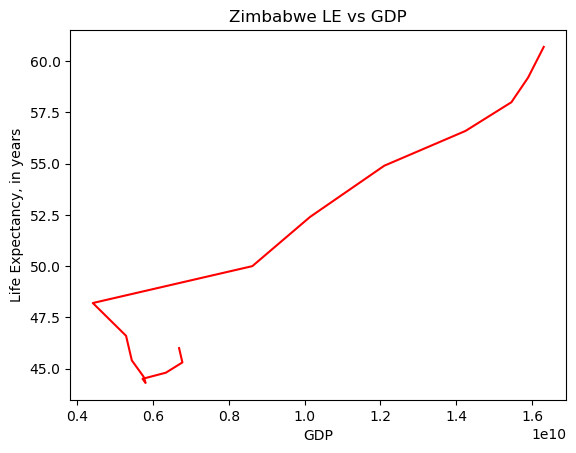

In [35]:

plt.plot(Zimbabwe.GDP, Zimbabwe.LE, color = "red")
plt.xlabel("GDP")
plt.ylabel("Life Expectancy, in years")
plt.title("Zimbabwe LE vs GDP")
plt.show()


### In conclusion, there is a correlation between life expectancy and a country's GDP. ###
### As GDP goes up, for a country, the citizen's life expectancy also goes up. ###
### Zimbabwe has the lowest GDP, by far, and also has the lowest life expectancy, by far. ###

## Further research ##

### This is a very interesting and unique article on Life Expectancy vs GDP. ###
### https://www.mckinsey.com/mgi/our-research/pixels-of-progress-chapter-2 ###

### What happened in Zimbabwe in the years 2000-2005?  ###
### https://en.wikipedia.org/wiki/2000s_in_Zimbabwe ###

In [42]:
Image(url="dog-scientist-resize.jpeg", width=300, height=300) 